## Datastory project

TODO choose title:
Influence of socioeconomic factors on mortality rate of covid pandemic
Influence covid in different regions based on gdp
The Role of GDP in COVID-19 Impact Across Different Regions

### Introduction

The covid-19 pandemic was the biggest pandemic of the 21st century, which is no question a big deal. But why did some countries suffer less or shorter than other countries? Answering this question is important for finding counter measures that could be used during future pandemic outbreaks.

This project aims to analyze the global impact of the COVID-19 pandemic on health outcomes and whether they are influenced by socioeconomic status. By examining datasets related to COVID-19 case numbers, deaths, vaccination rates, and socioeconomic indicators such as GDP, we will explore how the pandemic has affected different population groups worldwide. The goal is to identify patterns and provide insights that could explain difference in casualty rates across the world.

### Dataset and Preprocessing

### Perspective 1: 
**Countries with higher GDP and higher vaccination rates have managed the COVID-19 pandemic more effectively, resulting in lower mortality rates and better health outcomes despite high case numbers**


#### Argument 1: 
*Richer countries have better access to vaccines, higher vaccination rates lead to lower deaths to COVID*

Based on the plot below, you can see the relation between countries of the amount of fully vaccinated people against COVID-19 per 100 inhabitants and lower excess deaths per million inhabitants. With a correlation coefficient of ≈-0,5 (figure 1.1) this is a significant negative correlation that shows COVID vaccination correlates with lower excess deaths. 

On the second plot you can see the relation between the income of a country per inhabitant (in GDP per capita in US$ PPP) and again the amount of people fully vaccinated. For COVID-19, to be fully vaccinated means to have taken two vaccins. With a correlation coefficient of ≈0,6 this shows a significant correlation between the income of a country per inhabitant and more people vaccinated per 100. 

To measure the impact of the pandemic in terms of deaths, we have taken the excess mortality. This data compares the number of deaths during the COVID-19 pandemic compared to the deaths we would have expected had the pandemic not occurred. This is an estimated using a regression model that uses using deaths data from 2015-2019. The model accounts for seasonal variation and year-to-year trends in mortality. 

The advantage of using excess mortality instead of the registered COVID-19 deaths is that in addition to confirmed COVID-19 deaths it also captures the deaths that were not correctly diagnosed and reported. This means it accounts for countries with weak health systems and less robust data collection.

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

/tmp/ipykernel_3280/2052732352.py:32: FutureWarning:

SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead

/tmp/ipykernel_3280/2052732352.py:32: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_3280/2052732352.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3280/2052732352.py:32: FutureWarning:

SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a 

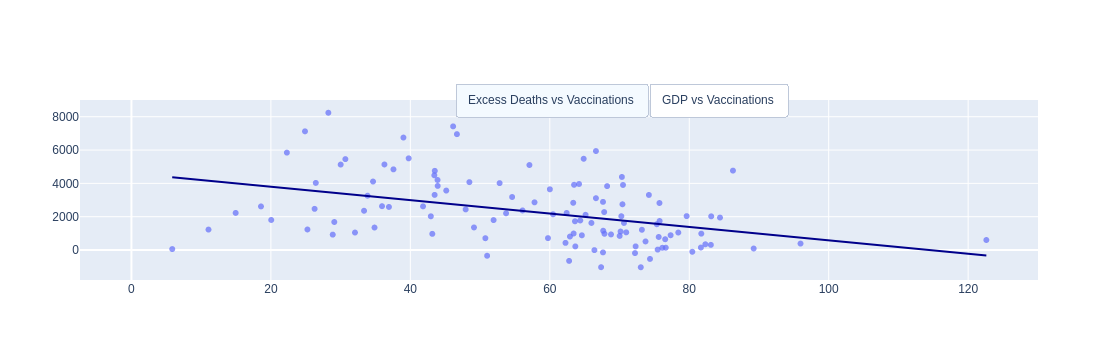

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the CSV file
df = pd.read_csv('owid-covid-data.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the year 2022
df_2022 = df[df['date'].dt.year == 2022].copy()

# Function to fill NaN values with the last available non-NaN value per country
def fill_last_available(df, col):
    df.loc[:, col] = df.groupby('location')[col].ffill()
    return df

# Fill NaN values for the relevant columns
df_2022 = fill_last_available(df_2022, 'excess_mortality_cumulative_per_million')
df_2022 = fill_last_available(df_2022, 'people_fully_vaccinated_per_hundred')

# Extract the last available data for each country in 2022
df_last_2022 = df_2022.groupby('location').last().reset_index()

# Create scatter plot for excess deaths vs people fully vaccinated
fig1 = px.scatter(df_last_2022, x='people_fully_vaccinated_per_hundred', y='excess_mortality_cumulative_per_million', 
                 trendline='ols', trendline_color_override='darkblue',
                 title='Excess mortality per million inhabitants vs. People fully vaccinated per hundred inhabitants, per country for 2022',
                 labels={'people_fully_vaccinated_per_hundred': 'People fully vaccinated per hundred inhabitants',
                         'excess_mortality_cumulative_per_million': 'Excess mortality cumulative per million inhabitants'},
                 hover_name='location', opacity=0.7)

# Grab the last available GDP per capita data for 2022
df_gdp = df[df['date'].dt.year == 2022].groupby('location').last().reset_index()

# Create scatter plot for GDP vs people fully vaccinated
fig2 = px.scatter(df_gdp, x='people_fully_vaccinated_per_hundred', y='gdp_per_capita', 
                 trendline='ols', trendline_color_override='darkblue',
                 title='GDP per capita vs. People fully vaccinated per hundred inhabitants, per country for 2022',
                 labels={'people_fully_vaccinated_per_hundred': 'People fully vaccinated per hundred inhabitants',
                         'gdp_per_capita': 'GDP per capita'},
                 hover_name='location', opacity=0.7)

# Create a figure with subplots
fig = go.Figure()

# Add traces for the first plot
for trace in fig1.data:
    fig.add_trace(trace)

# Add traces for the second plot
for trace in fig2.data:
    fig.add_trace(trace)

# Update layout for buttons to toggle between plots, set axis titles, and define x-axis ranges dynamically
fig.update_layout(
    title="Excess mortality per million inhabitants vs. People fully vaccinated per hundred inhabitants, per country for 2022",  # Set initial title here
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig1.data) + [False] * len(fig2.data)},
                          {"title": "Excess mortality per million inhabitants vs. People fully vaccinated per hundred inhabitants, per country for 2022",
                           "xaxis": {"title": "People fully vaccinated per hundred inhabitants", "range": [18, 110]},
                           "yaxis": {"title": "Excess mortality cumulative per million inhabitants"}}],
                    label="Excess Deaths vs Vaccinations",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig1.data) + [True] * len(fig2.data)},
                          {"title": "GDP per capita vs. People fully vaccinated per hundred inhabitants, per country for 2022",
                           "xaxis": {"title": "People fully vaccinated per hundred inhabitants", "range": [0, 110]},
                           "yaxis": {"title": "GDP per capita"}}],
                    label="GDP vs Vaccinations",
                    method="update"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.57,
            xanchor="center",
            y=1.15,
            yanchor="top"
        ),
    ],
    # Set initial axis titles and range
    xaxis={"title": "People fully vaccinated per hundred inhabitants", "range": [18, 110]},
    yaxis={"title": "Excess mortality cumulative per million inhabitants"}
)

# Initially set the second plot to be not visible
for i in range(len(fig2.data)):
    fig.data[len(fig1.data) + i].visible = False

fig.show()

#### Argument 2: 
**Countries with a lower gdp have less resources to spend on testing and recording data which makes it seem like they are performing better at handling the pandemic**

To visualize how GDP impacts various factors, we can use a parallel categories plot to visualize the correlations between these categories. This type of plot will help us understand how countries with lower GDP might appear to manage the pandemic more effectively due to limited resources for testing and data recording. We have chosen to use data from the year 2021 because this is the year when the majority of people began to receive vaccinations.


In [10]:
import pandas as pd
import plotly.graph_objs as go


# Load COVID-19 and GDP data
covid_df = pd.read_csv('owid-covid-data.csv')
gdp_df = pd.read_csv('GDP-data.csv', skiprows=4)

# Filter COVID-19 data for 2021 and 2020 and exclude certain locations
covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]
covid_2020_df = covid_df[covid_df['date'].str.startswith('2020')]
exclude_locations = ['World', 'Upper middle income', 'Lower middle income', 'High income', 'Low income',
                     'European Union', 'North America', 'South America', 'Asia', 'Oceania', 'Africa']
covid_2021_df = covid_2021_df[~covid_2021_df['location'].isin(exclude_locations)]
covid_2020_df = covid_2020_df[~covid_2020_df['location'].isin(exclude_locations)]

# Define variables of interest
variables = ['total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 
             'total_tests_per_thousand', 'excess_mortality_cumulative_per_million']

# Compute last values for each variable by location for 2021 and 2020
last_values_2021_dfs = {}
last_values_2020_dfs = {}
for var in variables:
    last_values_2021_dfs[var] = covid_2021_df.groupby('location').last()[var].reset_index()
    last_values_2020_dfs[var] = covid_2020_df.groupby('location').last()[var].reset_index()

# Merge COVID-19 variables for 2021 with GDP data
merged_df = last_values_2021_dfs[variables[0]]
for var in variables[1:]:
    merged_df = pd.merge(merged_df, last_values_2021_dfs[var], on='location', how='left')

# Rename columns for clarity
for var in variables:
    merged_df = merged_df.rename(columns={var: f'{var}_2021'})

# Merge last values of 2020
for var in variables:
    if var != 'people_vaccinated_per_hundred':  # Skip 'people_vaccinated_per_hundred'
        merged_df = pd.merge(merged_df, last_values_2020_dfs[var].rename(columns={var: f'{var}_2020'}), on='location', how='left')

# Adjust variables by subtracting 2020 values from 2021 values, except for 'people_vaccinated_per_hundred'
for var in variables:
    if var != 'people_vaccinated_per_hundred':
        merged_df[var] = merged_df[f'{var}_2021'] - merged_df[f'{var}_2020']
    else:
        merged_df[var] = merged_df[f'{var}_2021']

# Drop unnecessary columns
columns_to_drop = [f'{var}_2021' for var in variables if var != 'people_vaccinated_per_hundred'] + [f'{var}_2020' for var in variables if var != 'people_vaccinated_per_hundred']
merged_df = merged_df.drop(columns=columns_to_drop)

# Merge with GDP data
gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]
final_merged_df = pd.merge(merged_df, gdp_df, on='location', how='inner')
final_merged_df = final_merged_df.rename(columns={"2021": "GDP_2021"})

# Categorical binning for each variable
for var in variables + ['GDP_2021']:
    final_merged_df[f'{var}_category'] = pd.qcut(final_merged_df[var], q=3, labels=['low', 'medium', 'high'])

# Define category orders for each variable
category_orders = {
    'GDP_2021_category': ['low', 'medium', 'high'],
    'total_deaths_per_million_category': ['low', 'medium', 'high'],
    'total_cases_per_million_category': ['low', 'medium', 'high'],
    'people_vaccinated_per_hundred_category': ['low', 'medium', 'high'],
    'total_tests_per_thousand_category': ['low', 'medium', 'high'],
    'excess_mortality_cumulative_per_million_category': ['low', 'medium', 'high'] 
}

# Ensure all variables are treated as categorical
for var in variables + ['GDP_2021']:
    final_merged_df[f'{var}_category'] = final_merged_df[f'{var}_category'].astype('category').cat.add_categories('nan').fillna('nan')

# Define dimensions for Plotly Parcats
dimensions = [
    {'label': 'GDP 2021', 'values': final_merged_df['GDP_2021_category'], 'categoryorder': 'array', 'categoryarray': category_orders['GDP_2021_category']},
    {'label': 'Total Deaths', 'values': final_merged_df['total_deaths_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['total_deaths_per_million_category']},
    {'label': 'Total Cases', 'values': final_merged_df['total_cases_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['total_cases_per_million_category']},
    {'label': 'People Vaccinated', 'values': final_merged_df['people_vaccinated_per_hundred_category'], 'categoryorder': 'array', 'categoryarray': category_orders['people_vaccinated_per_hundred_category']},
    {'label': 'Total Tests', 'values': final_merged_df['total_tests_per_thousand_category'], 'categoryorder': 'array', 'categoryarray': category_orders['total_tests_per_thousand_category']},
    {'label': 'Excess Mortality', 'values': final_merged_df['excess_mortality_cumulative_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['excess_mortality_cumulative_per_million_category']}
]

# Create the Parcats figure
fig = go.Figure(data=[
    go.Parcats(
        dimensions=dimensions,
        line={'color': final_merged_df['GDP_2021_category'].cat.codes, 'colorscale': 'Viridis', 'showscale': False},
        hoverinfo='count+probability',
        arrangement='freeform'
    )
])

# Update layout and display the plot
fig.update_layout(
    title='Parallel Categories Plot of COVID-19 and GDP Data',
    height=600
)

fig.show()


In this parallel categories plot, we excluded outliers in our location data such as continents, income groups, and global aggregates. Additionally, we categorized the values into high, medium, and low by dividing them into three bins. For the total deaths, total cases and excess mortality we used the variables per million and for people vaccinated and total tests we used the variables per hundred.

The plot above shows that countries with low GDP tend to have lower values for total deaths per million and total cases per million, which creates the impression that they managed the pandemic more effectively than high GDP regions. However, these countries also tend to have lower vaccination rates compared to regions with medium and high GDP. Furthermore the plot also shows that lower GDP regions have either a low test rate or the data is unavailable. Additionally, the data on excess mortality rates per million is also often unavailable for lower GDP regions. Based on the plot, we can conclude that the lower reported total deaths and cases per million in low GDP countries may not accurately reflect their handling of the pandemic. Instead, these figures might be influenced by limited resources for testing and data recording. Additionally, the lower vaccination rates and lack of data on excess mortality rates in low GDP regions suggest that the pandemic's true impact may be underreported in these areas.


### Perspective 2: 
**Countries with a lower gdp have not necessarily managed the covid pandemic worse.**

Although there might be some truth to the statement that money and resources helped lighten the burden of the covid-19 pandemic, there also might be some other factors at play. These factors may also occur in countries with a lower GDP per capita. For this reason it is important that we explore other possible explainations for having a lower mortality rate. 

#### Argument 1: 
**Countries with a lower gdp per capita do not have more cases and deaths than Countries with a high gdp per capita**

Different regions of the world generally have wildly different socio-economic circumstances. Mapping the countries against their respective mortality rate should provide us an insight into the possible causations for higher and lower mortality rates. We have chosen to try to map the mortality rate across different years aswell because we were interested to see whether the general contrast between high and low mortality rate stayed the same across all years or whether there were changes throughout the years.

In [11]:
import plotly.express as px
import plotly.graph_objects as go

CovidData = pd.read_csv('owid-covid-data.csv')
GDPdata = pd.read_csv('GDP-data.csv', skiprows=4)

# Filter the data for the years 2020, 2021, and 2022
years = ['2020', '2021', '2022']
CovidData['year'] = CovidData['date'].str[:4]
CovidData = CovidData[CovidData['year'].isin(years)]

# Preprocess GDP data
GDPdata = GDPdata.rename(columns={'Country Name': 'location'})

# Preprocess Covid data for each year
def preprocess_covid_data(year):
    Covid_year = CovidData[CovidData['year'] == year]
    Covid_deaths_year = Covid_year.groupby('location').last()['total_deaths_per_million'].reset_index()
    df_year = pd.merge(GDPdata, Covid_deaths_year, on='location', how='inner')
    df_year = df_year[~df_year['location'].isin([
        'World', 'Upper middle income', 'Lower middle income', 'High income', 
        'Low income', 'European Union', 'North America', 'South America', 
        'Asia', 'Oceania', 'Africa', 'Peru'
    ])]
    return df_year

df_2020 = preprocess_covid_data('2020')
df_2021 = preprocess_covid_data('2021')
df_2022 = preprocess_covid_data('2022')

# Create a function to generate the choropleth map for a specific year
def create_choropleth(df, year):
    fig = px.choropleth(
        df, 
        locations="Country Code",
        color="total_deaths_per_million",
        hover_name="location",
        color_continuous_scale=px.colors.sequential.Blues_r,
        title=f"Deaths per million by Country ({year})"
    )
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        height=600
    )
    return fig

# Generate choropleth maps for each year
fig_2020 = create_choropleth(df_2020, '2020')
fig_2021 = create_choropleth(df_2021, '2021')
fig_2022 = create_choropleth(df_2022, '2022')

# Create a figure with all traces
fig = go.Figure(data=fig_2020.data + fig_2021.data + fig_2022.data)

# Update the layout to include dropdown buttons
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': '2020',
                    'method': 'update',
                    'args': [{'visible': [True, False, False]}]
                },
                {
                    'label': '2021',
                    'method': 'update',
                    'args': [{'visible': [False, True, False]}]
                },
                {
                    'label': '2022',
                    'method': 'update',
                    'args': [{'visible': [False, False, True]}]
                }
            ],
            'direction': 'down',
            'showactive': True,
        }
    ],
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
    ),
    height=600
)

# Show the figure
fig.show()

In the graph above Peru has been filtered out as its mortality rate was exceptionaly high which skewed the contrast between high and low mortality rates.

The graph above shows the mortality rate per million in countries across the world. As you can see there are more casualties per million in the Americas and Europe compared to Africa and Asia. This is highlighted by the fact that Peru has been filtered out as to make the contrast clearer between the comparatively high and low mortality rates. This is true for every recorded year of the pandemic. This means that across those three years something that did not change through that period of time, caused some countries to have lower and others to have higher mortality rates. Another notable statistic is that the amount of 

#### Argument 2: 
**Lower income countries have a lower median age, which results in a lower mortality rate.**

TODO: warnings weghalen

In [12]:
import pandas as pd

# Read the datasets
covid_df = pd.read_csv('owid-covid-data.csv')
gdp_df = pd.read_csv('GDP-data.csv', skiprows=4)

# Filter data for 2021
covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]

# Convert 'date' column to datetime for proper sorting and comparison
covid_2021_df['date'] = pd.to_datetime(covid_2021_df['date'])

# Find the last available date for each location in 2021
last_dates_2021 = covid_2021_df.groupby('location')['date'].idxmax()

# Filter the dataframe to only include rows with the last available date for each location
covid_last_2021 = covid_2021_df.loc[last_dates_2021]

# Group by location and take the last value for the required columns
covid_deaths_cases_2021 = covid_last_2021[['location', 'continent', 'total_deaths_per_million', 'total_cases_per_million', 'median_age', 'people_vaccinated_per_hundred', 'total_tests_per_thousand']].reset_index(drop=True)

GDPdata = GDPdata.rename(columns={'Country Name': 'location'})

df = pd.merge(GDPdata, covid_deaths_cases_2021, on='location', how='inner')

fig2 = px.scatter_3d(
    df,
    x="median_age",
    y="total_deaths_per_million",
    z="2021",
    hover_name="location",
    size_max=10,
    color='continent',
    title="Comparison of Deaths per Million median age and gdp per capita by Country",
    labels={
        "2021": "Gdp per capita 2021",
        "total_tests_per_thousand": "Total tests per thousand",
        "people_vaccinated_per_hundred": "vaccinated per hundred"
    }
)
fig2.show()

/var/folders/41/czx2hrt53jn1h0w1lqcg4f2m0000gp/T/ipykernel_44766/3828433997.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Summary

In summary, eventhough there are reasons suggesting that countries with a higher GDP per capita should have performed better at keeping excessive mortality rates low, the data does not always reflect that. Countries with a higher GDP should have more access to vaccines and the vaccines have been proven to lower excessive mortality rates in countries, but for some reason countries with a higher GDP per capita do not consistently outperform countries with a lower GDP per capita. This could be due to an inconsistency in recording the data, due to a lack of resources, which occurs more often in countries with a lower GDP per capita. On the other hand, there could be legitimate reason to why sometimes countries with a lower GDP per capita have performed better. For example: countries with a lower GDP per capita have a lower median age, which leads to a lower mortality rate.



### Reflection



#### Work Distribution

### References

The links for these datasets are: 
OWID Covid-19: https://ourworldindata.org/coronavirus#deaths-and-cases-our-data-source
GDP per capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD 
GDP per capita, PPP (current international $) | Data
